# Coding with EarthCube GeoCodes

GeoCodes is a component of NSF EarthCube program, enabling cross-domain discovery and access to geoscience data and research tools. Read about GeoCodes at https://www.earthcube.org/geocodes, and try out GeoCodes discovery interface (beta) at https://beta.geocodes.earthcube.org/.

This notebook demonstrates key elements of the GeoCodes platform and presents several ways of querying GeoCodes content. You will experiment with searching GeoCodes-harvested resource descriptions, retrieving resource metadata from the triple store, and converting query results to common structures used by Python programmers, for subsequent analysis.



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Coding-with-EarthCube-GeoCodes" data-toc-modified-id="Coding-with-EarthCube-GeoCodes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Coding with EarthCube GeoCodes</a></span><ul class="toc-item"><li><span><a href="#Author(s)" data-toc-modified-id="Author(s)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Author(s)</a></span></li><li><span><a href="#Purpose" data-toc-modified-id="Purpose-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Technical-contributions" data-toc-modified-id="Technical-contributions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Technical contributions</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Methodology</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Funding" data-toc-modified-id="Funding-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Funding</a></span></li><li><span><a href="#Keywords" data-toc-modified-id="Keywords-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Keywords</a></span></li><li><span><a href="#Citation" data-toc-modified-id="Citation-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Citation</a></span></li><li><span><a href="#Work-In-Progress---improvements" data-toc-modified-id="Work-In-Progress---improvements-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Work In Progress - improvements</a></span></li><li><span><a href="#Suggested-next-steps" data-toc-modified-id="Suggested-next-steps-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Suggested next steps</a></span></li><li><span><a href="#Acknowledgements" data-toc-modified-id="Acknowledgements-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Acknowledgements</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Library-import" data-toc-modified-id="Library-import-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Library import</a></span></li><li><span><a href="#Local-library-import" data-toc-modified-id="Local-library-import-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Local library import</a></span></li></ul></li><li><span><a href="#Parameter-definitions" data-toc-modified-id="Parameter-definitions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Parameter definitions</a></span><ul class="toc-item"><li><span><a href="#Specifying-service-endpoints" data-toc-modified-id="Specifying-service-endpoints-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Specifying service endpoints</a></span></li></ul></li><li><span><a href="#Data-import" data-toc-modified-id="Data-import-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data import</a></span></li><li><span><a href="#Data-processing-and-analysis" data-toc-modified-id="Data-processing-and-analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data processing and analysis</a></span><ul class="toc-item"><li><span><a href="#SPARQL-query-basics" data-toc-modified-id="SPARQL-query-basics-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>SPARQL query basics</a></span></li><li><span><a href="#Exploring-SPARQL-queries-in-the-GeoCodes-user-interface" data-toc-modified-id="Exploring-SPARQL-queries-in-the-GeoCodes-user-interface-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Exploring SPARQL queries in the GeoCodes user interface</a></span></li><li><span><a href="#Querying-GeoCodes-with-parameters" data-toc-modified-id="Querying-GeoCodes-with-parameters-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Querying GeoCodes with parameters</a></span><ul class="toc-item"><li><span><a href="#The-Ridgecrest-Earthquake-example" data-toc-modified-id="The-Ridgecrest-Earthquake-example-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>The Ridgecrest Earthquake example</a></span></li></ul></li><li><span><a href="#Finding-research-tools-in-GeoCodes" data-toc-modified-id="Finding-research-tools-in-GeoCodes-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Finding research tools in GeoCodes</a></span><ul class="toc-item"><li><span><a href="#The-Svartvatnet-Lake-example" data-toc-modified-id="The-Svartvatnet-Lake-example-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>The Svartvatnet Lake example</a></span></li></ul></li><li><span><a href="#Let's-retrieve-the-data-and-do-something-useful!" data-toc-modified-id="Let's-retrieve-the-data-and-do-something-useful!-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Let's retrieve the data and do something useful!</a></span><ul class="toc-item"><li><span><a href="#Wirewalker-data-example" data-toc-modified-id="Wirewalker-data-example-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Wirewalker data example</a></span></li><li><span><a href="#Retrieve-distributions-for-the-selected-dataset" data-toc-modified-id="Retrieve-distributions-for-the-selected-dataset-5.5.2"><span class="toc-item-num">5.5.2&nbsp;&nbsp;</span>Retrieve distributions for the selected dataset</a></span></li><li><span><a href="#Load-the-selected-distribution" data-toc-modified-id="Load-the-selected-distribution-5.5.3"><span class="toc-item-num">5.5.3&nbsp;&nbsp;</span>Load the selected distribution</a></span></li><li><span><a href="#Subset-and-visualize-the-data" data-toc-modified-id="Subset-and-visualize-the-data-5.5.4"><span class="toc-item-num">5.5.4&nbsp;&nbsp;</span>Subset and visualize the data</a></span></li></ul></li><li><span><a href="#What-have-we-learned?" data-toc-modified-id="What-have-we-learned?-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>What have we learned?</a></span></li><li><span><a href="#Extra-Credit:-Explore-the-GeoCodes-Graph" data-toc-modified-id="Extra-Credit:-Explore-the-GeoCodes-Graph-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Extra Credit: Explore the GeoCodes Graph</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Author(s)
Author1 = {"name": "EarthCube Office", "affiliation": "San Diego Supercomputer Center, UCSD", "email": "info@earthcube.org", "orcid": ""}
    


## Purpose
GeoCodes is a component of NSF EarthCube program, enabling cross-domain discovery and access to geoscience data and research tools. Read about GeoCodes at https://www.earthcube.org/geocodes, and try out GeoCodes discovery interface (beta) at https://beta.geocodes.earthcube.org/.

This notebook demonstrates key elements of the GeoCodes platform and presents several ways of querying GeoCodes content. You will experiment with searching GeoCodes-harvested resource descriptions, retrieving resource metadata from the triple store, and converting query results to common structures used by Python programmers, for subsequent analysis.



## Technical contributions
The main contribution of this notebook is a demonsrated sequence of SPARQL queries against the GeoCodes graph, from finding geocoding resources to using them for data analysis.


## Methodology
The notebook assumes the current working version of the GeoCodes (Beta, as of April 2021). SPARQL requests may need to be modified as GeoCodes evolves.

## Results
The main result is demonstrated methodology for querying GeoCodes content via SPARQL, which other projects are expected to implement.

## Funding
Award1 = {"agency": "US National Science Foundation", "award_code": "1928208", "award_URL": "https://www.nsf.gov/awardsearch/showAward?AWD_ID=1928208"}


## Keywords
keywords=["GeoCodes", "EarthCube", "Linked data", "SPARQL", "Geoscience"]

## Citation
EarthCube Office, 2021. Coding with GeoCodes, v.1. Jupyter Notebook. Available at https://github.com/earthcube/

## Work In Progress - improvements
The notebook will need updating if changes in underlying GeoCodes components necessitate updates to SPQRQL queries used in the notebook. 


## Suggested next steps
N/A

## Acknowledgements 
The key contributors to the notebook's SPARQL queries are David Valentine, Doug Fils and Michael Bobac. The notebook is developed by ILya Zaslavsky.  

# Setup

GeoCodes content is organized as a large graph created from data descriptions harvested from various data repositories. This graph can be queried using SPARQL query language. We will, therefore, rely on several Python packages that deal with graphs and support SPQRQL queries. We will also rely on common data science packages such as Pandas (to manage intermediate results in tabular format), Seaborn (for data visualization), json (to process results of SPARQL queries). 

In [ ]:
# Chances are that you already have some of these packages installed. 
# If not, please uncomment and install the packages you miss.

# !pip -q install SPARQLWrapper
# !pip install rdflib
# !pip install rdflib-jsonld
# !pip install seaborn
# !pip install pandas

## Library import

In [ ]:
import pandas as pd                                   # Python data analysis library widely used in data science
import json                                           # encoding and working with basic Python object hierarchies
from SPARQLWrapper import SPARQLWrapper, JSON         # Python wrapper to remotely execute SPARQL queries
import rdflib                                         # Python package for working with RDF documents

from string import Template                           # we'll need this when we use parameterized queries 
import seaborn as sns                                 # to visualize the data
import ipywidgets as widgets                          # interactive widgets



## Local library import
N/A


# Parameter definitions

Let's make sure pandas doesn't truncate dataframe display. We need to do this because we expect some fields (e.g., datasets descriptions) to be long

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Specifying service endpoints

GeoCodes sends SPARQL queries to a triplestore accessed via a specific service endpoint. The 'ecograph' endpoint is where the GeoCodes data resides:  

In [ ]:
ecograph = "https://graph.geodex.org/blazegraph/namespace/nabu/sparql"     # this is the GeoCodes data endpoint
ecrr = 'http://132.249.238.169:8080/fuseki/ecrr/query'                     # this is EarthCube Resource Registry

In [ ]:
# There are many SPARQL endpoints that you may experiment with, for example:

sweet = "http://cor.esipfed.org/sparql"                                    # ESIP SPARQL endpoint
dbsparql = "http://dbpedia.org/sparql"                                     # a public SPQRQL endpoint for DBPEDIA
ufokn = "http://graph.ufokn.org/blazegraph/namespace/ufokn-dev/sparql"     # Urban Flooding OKN


# Data import
N/A

# Data processing and analysis


This helper function will make a SPARQL request and convert the output to Pandas dataframe.

It takes a service endpoint, and a query string, as inputs.


In [ ]:
def get_sparql_dataframe(service, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    sparql = SPARQLWrapper(service)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

## SPARQL query basics

Basic SELECT SPARQL query looks like this:

```SPARQL
prefix schema: <http://schema.org/>
prefix sschema: <https://schema.org/>
SELECT DISTINCT ?s ?g  (MIN(?disurl) as ?url) (MAX(?score1) as ?score)   ?name ?description
WHERE {
  ?lit bds:search "${q}" .
  ?lit bds:matchAllTerms ${exact} .
  ?lit bds:relevance ?score1 .
  ?s ?p ?lit .

  VALUES (?dataset) { ( schema:Dataset ) ( sschema:Dataset ) }
  ?s a ?dataset .
  ?s schema:name|sschema:name ?name .

  graph ?g {
  ?s schema:description|sschema:description ?description .
  }

  OPTIONAL {
	?s schema:distribution|sschema:distribution ?dis .
	?dis schema:contentUrl |sschema:contentUrl  ?disurl .
  }

}
GROUP BY ?s ?g ?name ?description
ORDER BY DESC(?score1)
LIMIT ${n}
OFFSET ${o}
```

To phrase it in "English": 
 - we will be querying a GeoCodes graph for records that exactly match all terms in a query string specified in {q}
 - the query will return those records that are described using the Dataset structure as defined by schema.org
 - the records will include dataset names and descrptions
 - the number of returned datasets will be limited by {n}, and we will start showing them from the first one ({o})
 - the results will be grouped by name and description and sorted by relevance score in descending order 

You can find more information and examples at [1,2,3]


## Exploring SPARQL queries in the GeoCodes user interface

The easiest way to explore GeoCodes queries is to use its user interface and monitor queries issued by the GeoCodes client.

For example, search for __Carbon flux__ at https://beta.geocodes.earthcube.org/. Hit F12 to open browser Console. Among the messages you observe in the Console, there will be several SPARQL queries. You can copy and paste them below to see what they produce.


In [ ]:
query= """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix schema: <http://schema.org/>
prefix sschema: <https://schema.org/>
SELECT distinct ?subj ?g ?resourceType ?name ?description  ?pubname (GROUP_CONCAT(DISTINCT ?placename; SEPARATOR=", ") AS ?placenames)
        (GROUP_CONCAT(DISTINCT ?kwu; SEPARATOR=", ") AS ?kw)
        ?datep  (GROUP_CONCAT(DISTINCT ?url; SEPARATOR=", ") AS ?disurl) (MAX(?score1) as ?score)

        WHERE {
            ?lit bds:search "Carbon+Flux" .
            ?lit bds:matchAllTerms false .
            ?lit bds:relevance ?score1 .
            ?subj ?p ?lit .
            BIND (IF (exists {?subj a schema:Dataset .} ||exists{?subj a sschema:Dataset .} , "data", "tool") AS ?resourceType).
            filter( ?score1 > 0.04).
          graph ?g {
            Minus {?subj a sschema:ResearchProject } .
            Minus {?subj a schema:ResearchProject } .

            Minus {?subj a schema:Person } .
            Minus {?subj a sschema:Person } .
             ?subj schema:name|sschema:name ?name .
                       ?subj schema:description|sschema:description ?description .
             }
            optional {?subj schema:distribution/schema:url|schema:subjectOf/schema:url ?url .}
            OPTIONAL {?subj schema:datePublished|sschema:datePublished ?date_p .}
            OPTIONAL {?subj schema:publisher/schema:name|sschema:publisher/sschema:name|sschema:sdPublisher|schema:provider/schema:name ?pub_name .}
            OPTIONAL {?subj schema:spatialCoverage/schema:name|sschema:spatialCoverage/sschema:name ?place_name .}
            OPTIONAL {?subj schema:keywords|sschema:keywords ?kwu .}
            BIND ( IF ( BOUND(?date_p), ?date_p, "No datePublished") as ?datep ) .
            BIND ( IF ( BOUND(?pub_name), ?pub_name, "No Publisher") as ?pubname ) .
            BIND ( IF ( BOUND(?place_name), ?place_name, "No spatialCoverage") as ?placename ) .
        }
        GROUP BY ?subj ?pubname ?placenames ?kw ?datep ?disurl ?score ?name ?description  ?resourceType ?g
        ORDER BY DESC(?score)
LIMIT 1000
OFFSET 0
       """


In [ ]:
# Let's execute this query and display the results in a dataframe:

ecoresults = get_sparql_dataframe(ecograph, query)
ecoresults


Congratulations! You just executed your first SPARQL query in GeoCodes, and received the same results as you would get through the user interface. 

It works, but it is not really practical. We need to parameterize the query so that we stop referring to the GeoCodes UI and start doing all our GeoCodes work in the notebook.

## Querying GeoCodes with parameters

Let's set the basic structure of search queries against our GeoCodes endpoint as a template, and then re-use this template when we submit different search strings. Besides the search string, query parameters will include the number of records to return and the starting record.

Below is such a generic SELECT query that we'll use in a template. We don't need to copy and paste from the UI anymore!

Notice the parameter placeholders, e.g.,  `${q}`  in  `?lit bds:search "${q}" ` is a placeholder for the search string.

In [ ]:
geocodesFullText = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix schema: <http://schema.org/>
prefix sschema: <https://schema.org/>
SELECT distinct ?subj ?g ?resourceType ?name ?description  ?pubname (GROUP_CONCAT(DISTINCT ?placename; SEPARATOR=", ") AS ?placenames)
        (GROUP_CONCAT(DISTINCT ?kwu; SEPARATOR=", ") AS ?kw)
        ?datep  (GROUP_CONCAT(DISTINCT ?url; SEPARATOR=", ") AS ?disurl) (MAX(?score1) as ?score)

        WHERE {
            ?lit bds:search "${q}" .
            ?lit bds:matchAllTerms ${exact} .
            ?lit bds:relevance ?score1 .
            ?subj ?p ?lit .
            BIND (IF (exists {?subj a schema:Dataset .} ||exists{?subj a sschema:Dataset .} , "data", "tool") AS ?resourceType).
            filter( ?score1 > 0.04).
          graph ?g {
            Minus {?subj a sschema:ResearchProject } .
            Minus {?subj a schema:ResearchProject } .
            Minus {?subj a sschema:PropertyValue } .
            Minus {?subj a schema:PropertyValue } .
            Minus {?subj a schema:Person } .
            Minus {?subj a sschema:Person } .
             ?subj schema:name|sschema:name ?name .
                       ?subj schema:description|sschema:description ?description .
             }
            optional {?subj schema:distribution/schema:url|schema:subjectOf/schema:url ?url .}
            OPTIONAL {?subj schema:datePublished|sschema:datePublished ?date_p .}
            OPTIONAL {?subj schema:publisher/schema:name|sschema:publisher/sschema:name ?pub_name .}
            OPTIONAL {?subj schema:spatialCoverage/schema:name|sschema:spatialCoverage/sschema:name|sschema:sdPublisher ?place_name .}
            OPTIONAL {?subj schema:keywords|sschema:keywords ?kwu .}
            BIND ( IF ( BOUND(?date_p), ?date_p, "No datePublished") as ?datep ) .
            BIND ( IF ( BOUND(?pub_name), ?pub_name, "No Publisher") as ?pubname ) .
            BIND ( IF ( BOUND(?place_name), ?place_name, "No spatialCoverage") as ?placename ) .
        }
        GROUP BY ?subj ?pubname ?placenames ?kw ?datep ?disurl ?score ?name ?description  ?resourceType ?g
        ORDER BY DESC(?score)
LIMIT ${n}
OFFSET ${o}
"""

In [ ]:
# Initialize the template
geocodesFullTextTemplate = Template(geocodesFullText)

### The Ridgecrest Earthquake example

We'll now use the template we initialized to find datasets about __Ridgecrest Earthquake__.  It was a sequence of earthquakes (three initial main shocks of magnitudes 6.4, 5.4, and 7.1) in July 2019, approximately midway between Bakersfield, CA and Las Vegas, NV. See more about the Ridgecrest Earthquake at https://en.wikipedia.org/wiki/2019_Ridgecrest_earthquakes.


In [ ]:
# The search parameters are:
q = 'Ridgecrest Earthquake'
exact = True                            # match all terms
o = 0                                   # start
n = 10                                  # limit number of results to 10

# Substitute the parameters in the template with our actual search values
ridgecrest_query = geocodesFullTextTemplate.substitute(q=q,exact=exact,n=10,o=0)

# Submit request and display the results
ridgecrestresults = get_sparql_dataframe(ecograph, ridgecrest_query)
ridgecrestresults

## Finding research tools in GeoCodes
GeoCodes allows you to figure out software tools associated with the data you need. Information about the tools is stored in EarthCube Resource Registry (ECRR). In the next query, we will find these tools.

This query will be about Svartvatnet, a lake in southern Spitsbergen, Norway. This is an area of extensive paleoclimate reconstruction research with analysis of oxygen isotope composition, lithostratigraphy, and dating of sediment sequences.

### The Svartvatnet Lake example

This query will be about Svartvatnet, a lake in southern Spitsbergen, Norway. This is an area of extensive paleoclimate reconstruction research with analysis of oxygen isotope composition, lithostratigraphy, and dating of sediment sequences.

In [ ]:
# The search parameters are:
q = 'Svartvatnet'
exact = True # match all terms
o = 0 # start
n = 10 # limit number of results to 10

# Substitute the parameters in the template with our actual search values
Svartvatnet_query = geocodesFullTextTemplate.substitute(q=q,exact=exact,n=10,o=0)

# Submit request and display the results
Svartvatnet_results = get_sparql_dataframe(ecograph, Svartvatnet_query)
Svartvatnet_results

To add available tools to this dataframe, we need to issue an additional query, now involving EarthCube Resource Registry. 

We will use the following query string and then initialize the query template:

In [ ]:
getDownloadsQueryString = """
PREFIX schema:  <https://schema.org/>
PREFIX schemaold:  <http://schema.org/>
select DISTINCT ?rrs ?name ?curl ?landingPage
WHERE                    {
    graph <${g}>
      {
        {
          ?s schemaold:distribution|schema:distribution ?dist .
          ?dist  schemaold:encodingFormat|schema:encodingFormat ?type .
          ?dist schemaold:contentUrl|schema:contentUrl|schema:url|schemaold:url ?curl
        }
        UNION {
          VALUES (?dataset) { ( schema:Dataset ) ( schemaold:Dataset ) }
          ?s a ?dataset .
          ?s  schemaold:encodingFormat|schema:encodingFormat ?type .
          }
     }
     BIND (str(?type) as ?label)
     SERVICE <http://132.249.238.169:8080/fuseki/ecrr/query> {
      GRAPH <http://earthcube.org/gleaner-summoned>
       {
          ?rrs schema:supportingData ?df.
              ?df schema:encodingFormat  ?label ;
                  schema:position "input".
              ?rrs schema:name ?name.
               ?rrs schema:subjectOf/schema:url ?landingPage
       }
   }
}
"""
getDownloadsTemplate = Template(getDownloadsQueryString)


This function will use the above query template to query each dataset record for associated research tools registered in the Resource Registry.


In [ ]:
def addTools( g):
    getDownloadsQuery = getDownloadsTemplate.substitute(g=g)
    return get_sparql_dataframe(ecograph, getDownloadsQuery)


They will be added as an additional column in the table of results.


In [ ]:
Svartvatnet_results['tools'] = Svartvatnet_results['g'].apply(lambda g: addTools( g))

In [ ]:
# See the tools in the last column
Svartvatnet_results

## Let's retrieve the data and do something useful!

Geocodes helps you discover datasets, and then retrieve selected datasets for analysis.



### Wirewalker data example

In this example, we'll query GeoCodes for Wirewalker data collected in the Mission Beach area in San Diego. 

See more about the device at https://rbr-global.com/products/systems/wirewalker

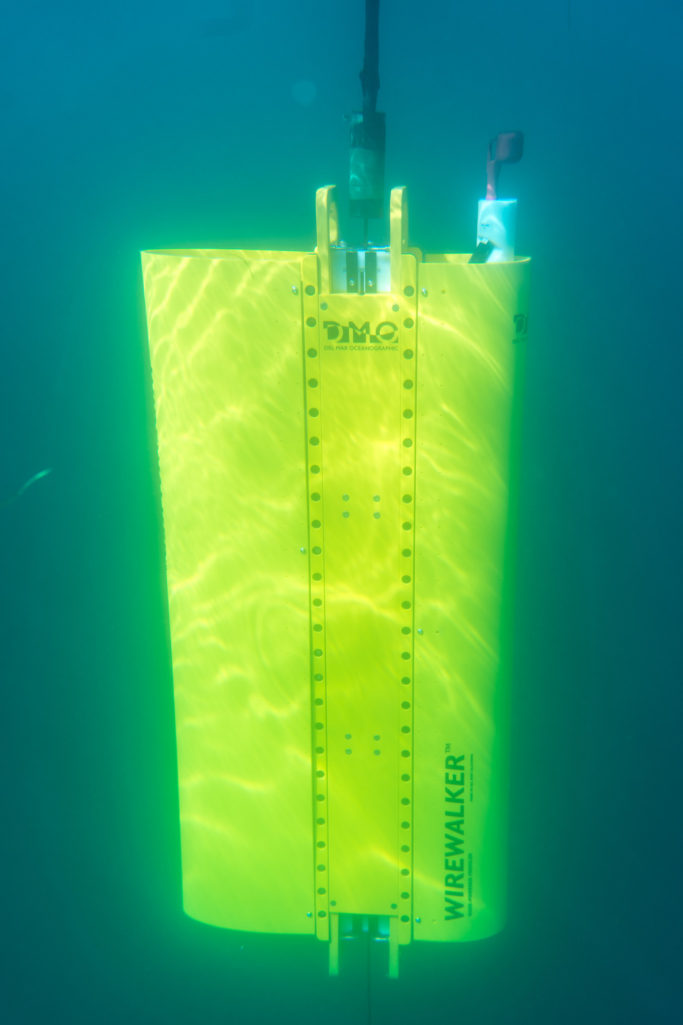

In [ ]:
# As before, we start by querying GeoCodes.
# The search parameters are:
q = 'WireWalker Mission Beach'
exact = True 
o = 0 
n = 10 

# Substitute the parameters in the template with our actual search values
WireWalker_query = geocodesFullTextTemplate.substitute(q=q,exact=exact,n=10,o=0)

# Submit request and display the results
WireWalker_results = get_sparql_dataframe(ecograph, WireWalker_query)
WireWalker_results


The first dataset has the highest relevance score. Let's determine if the data are available, and in what format.

To do this, let's explore the subgraph under the first graph node, and see what "distributions" it includes. 


In [ ]:
o = WireWalker_results.at[0,'g']

### Retrieve distributions for the selected dataset

Distributions are different versions/formats of the data available for the selected datasets. We will retrieve one of the available distributions for the first dataset. This requires an additional `getDistributionsQuery`.


In [ ]:
# Below is the query template we are going to instantiate to retrive distributions for a given dataset

getDistributionsQueryString = """
PREFIX sdos: <https://schema.org/>
PREFIX schemaold: <http://schema.org/>
select DISTINCT    ?durl   ?dist  ?type
WHERE
{
   graph <${g}> {
   ?s schemaold:distribution|sdos:distribution ?dist ;
        schemaold:name|sdos:name ?dataname  .
   ?dist  schemaold:encodingFormat|sdos:encodingFormat ?type .
         OPTIONAL {?dist sdos:contentUrl ?durl }.
 }
 BIND (str(?type) as ?label)

}
"""
getDistributionsTemplate = Template(getDistributionsQueryString)

In [ ]:
# Execute the query and observe distribution results

getDistributionsQuery = getDistributionsTemplate.substitute(g=o)
distributions = get_sparql_dataframe(ecograph, getDistributionsQuery)
distributions

In [ ]:
# Select the distribution you'd like to work with

distribution_options = distributions['durl']
sel_distribution = widgets.Dropdown(options=distribution_options, description='Distribution:')

In [ ]:
display(sel_distribution)

### Load the selected distribution

In [ ]:
data = pd.read_table(sel_distribution.value, sep='\t')
data.head()

In [ ]:
# This is a pretty large dataset:
data.shape

### Subset and visualize the data

In [ ]:
# Let's subset it for the sake of demonstration. We'll create lists for variables, depths levels, and dates of measurements

# for variables:
variable_options = data.columns.values.tolist()
variable_options = [x for x in variable_options if x not in ["dnum", "date", "time","day","ISO_DateTime_UTC","depth","mask"]]
variable_options

In [ ]:
# for depth levels, and for dates:
date_options = sorted(data['date'].unique())
depth_options = sorted(data['depth'].unique())

In [ ]:
# Set them all as dropdown widgets:

sel_variable = widgets.Dropdown(options=variable_options, description='Variable:')
sel_date = widgets.Dropdown(options=date_options, description='Date:')
sel_depth = widgets.Dropdown(options=depth_options, description='Depth:')

# All this is deliberately as pedestrian as possible  

In [ ]:
# Select variable of interest:
display(sel_variable)

In [ ]:
display(sel_date)

In [ ]:
display(sel_depth)

In [ ]:
data_subset = data.loc[(data['depth'] == sel_depth.value) & (data['date'] == sel_date.value)]
data_subset.shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(18, 5))

sns.lineplot (data=data_subset, x="time", y=sel_variable.value)

## What have we learned?
    
- How SPARQL queries look like
- How to query GeoCodes by pasting SPARQL queries from the Geocodes user interface 
- How to find datasets in GeoCodes using parameterized queries
- How to find tools associated with datasets
- How to retrieve specific dataset distributions, download the data, and start on analysis

## Extra Credit: Explore the GeoCodes Graph

GeoCodes harvests metadata records from several data facilities, members of the Council of Data Facilities (CDF).

This section will let you explore the current content of the GeoCodes graph, by subgraphs of data failities.

In [ ]:
import s3fs

oss = s3fs.S3FileSystem(
      anon=True,
      key="",
      secret="",
      client_kwargs = {"endpoint_url":"https://oss.geodex.org"}
   )

In [ ]:
# A list of objects in the graph

oss.ls('gleaner/results/cdfv3')

In [ ]:
# import gzip

# Select one of the graphs for a data facility, and read its content 

with oss.open('gleaner/results/cdfv3/opentopo_graph.nq', 'rb') as f:
    file_content = f.read()  #.decode("utf-8", "ignore").replace('\n',' ')
    


In [ ]:
# list objects in the selected graph

g = rdflib.Graph()
parsed = g.parse(data = file_content, format="nquads")
g.all_nodes()

# References

[1] Learn SPARQL: Write Knowledge Graph queries using SPARQL with step-by-step examples (2018). Accessed 4/7/2021 at: https://www.stardog.com/tutorials/sparql/

[2] Lee Feigenbaum. SPARQL By Example: The Cheat Sheet (2018). Accessed 4/7/2021 at http://www.iro.umontreal.ca/~lapalme/ift6281/sparql-1_1-cheat-sheet.pdf

[3] Angus Addlesee. Constructing More Advanced SPARQL Queries (2019. Accessed 4/7/2021 at https://medium.com/wallscope/constructing-more-advanced-sparql-queries-72d5ade1eedc